# Use Chromium
# Scroll control
- Chromium에서만 작동 (Firefox에서는 불가능)
- scroll(current_x, current_y, destination_x, destination_y)
- perform(): perform
- origin = element: element가 보일 때까지 이동

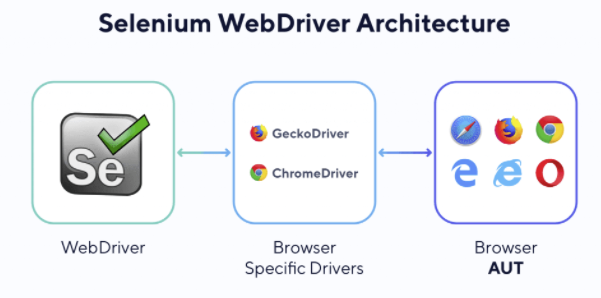


Reference:
https://testup.io/what-is-the-difference-between-chromdriver-and-webdriver-in-selenium/

# Helpful functions, modules, etc..
- https://www.selenium.dev/selenium/docs/api/py/index.html

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver import ActionChains

ActionChains(driver).scroll(0, 0, 0, 100).perform()


# Wait
- Explicit wait
  - 특정 조건이 만족될 때까지 기다리도록 설정

- Implicit wait
  - 조건없이 일정 시간을 항상 기다리도록 설정

# Headless 상황에서 확인하는 법

In [ ]:
driver.save_screenshot('s1.png')

# 네이버 운세보기 Script

In [ ]:
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as ec
#from selenium.webdriver.firefox.options import Options
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver import ActionChains

opt = Options()
opt.headless = True

driver = webdriver.Chrome(options = opt)
driver.get('https:/www.naver.com')

# 운세 검색
search = driver.find_element(By.XPATH, '//input[@id = "query"]')
search.send_keys("운세" + Keys.ENTER)
WebDriverWait(driver, timeout = 10).until(ec.title_contains('운세'))

# 성별 선택
male = driver.find_element(By.XPATH, '//span[@data-value = "m"]')
female = driver.find_element(By.XPATH, '//span[@data-value = "f"]')

# 생년월일 입력
birth_box = driver.find_element(By.XPATH, '//input[@title = "생년월일시"]')

# 양력, 음력 평달, 음력 윤달 중 선택
solar_cal = driver.find_element(By.XPATH, '//ul[contains(@class, "birthStandard")]')
lunarGeneral = driver.find_element(By.XPATH, '//li[@data-value = "lunarGeneral"]')
lunarLeap = driver.find_element(By.XPATH, '//li[@data-value = "lunarLeap"]')

# 태어난 시각 선택
luck_time = driver.find_element(By.XPATH, '//ul[contains(@class, "luck_time")]')
time = driver.find_elements(By.XPATH, '//ul[contains(@class, "luck_time")]/li')

# 운세보기 클릭
luck = driver.find_element(By.XPATH, '//input[@alt = "운세보기"]')

#print(driver.title)
male.click()
birth_box.send_keys("19990107")
solar_cal.click()
luck_time.click()
time[2].click()
luck.click()

WebDriverWait(driver, timeout = 10).until(ec.visibility_of_element_located((By.XPATH, '//dl[contains(@class, luckText)]/descendant::p')))
# 결과 저장
total_result = driver.find_element(By.XPATH, '//dl[contains(@class, luckText)]/descendant::p')
print('총운')
print(total_result.text)

# love = driver.find_element(By.XPATH, '//div[@class = "birth_love"]')
# love.click()
# love_result = driver.find_element(By.XPATH, '//dl[contains(@class, luckText)]/descendant::p')

driver.quit()

# Screenshot
- save_screenshot(): 화면 캡쳐
- screenshot(): 특정 부분 캡쳐

# 기상누리 (날씨 사이트)에서 특정 부분 캡쳐

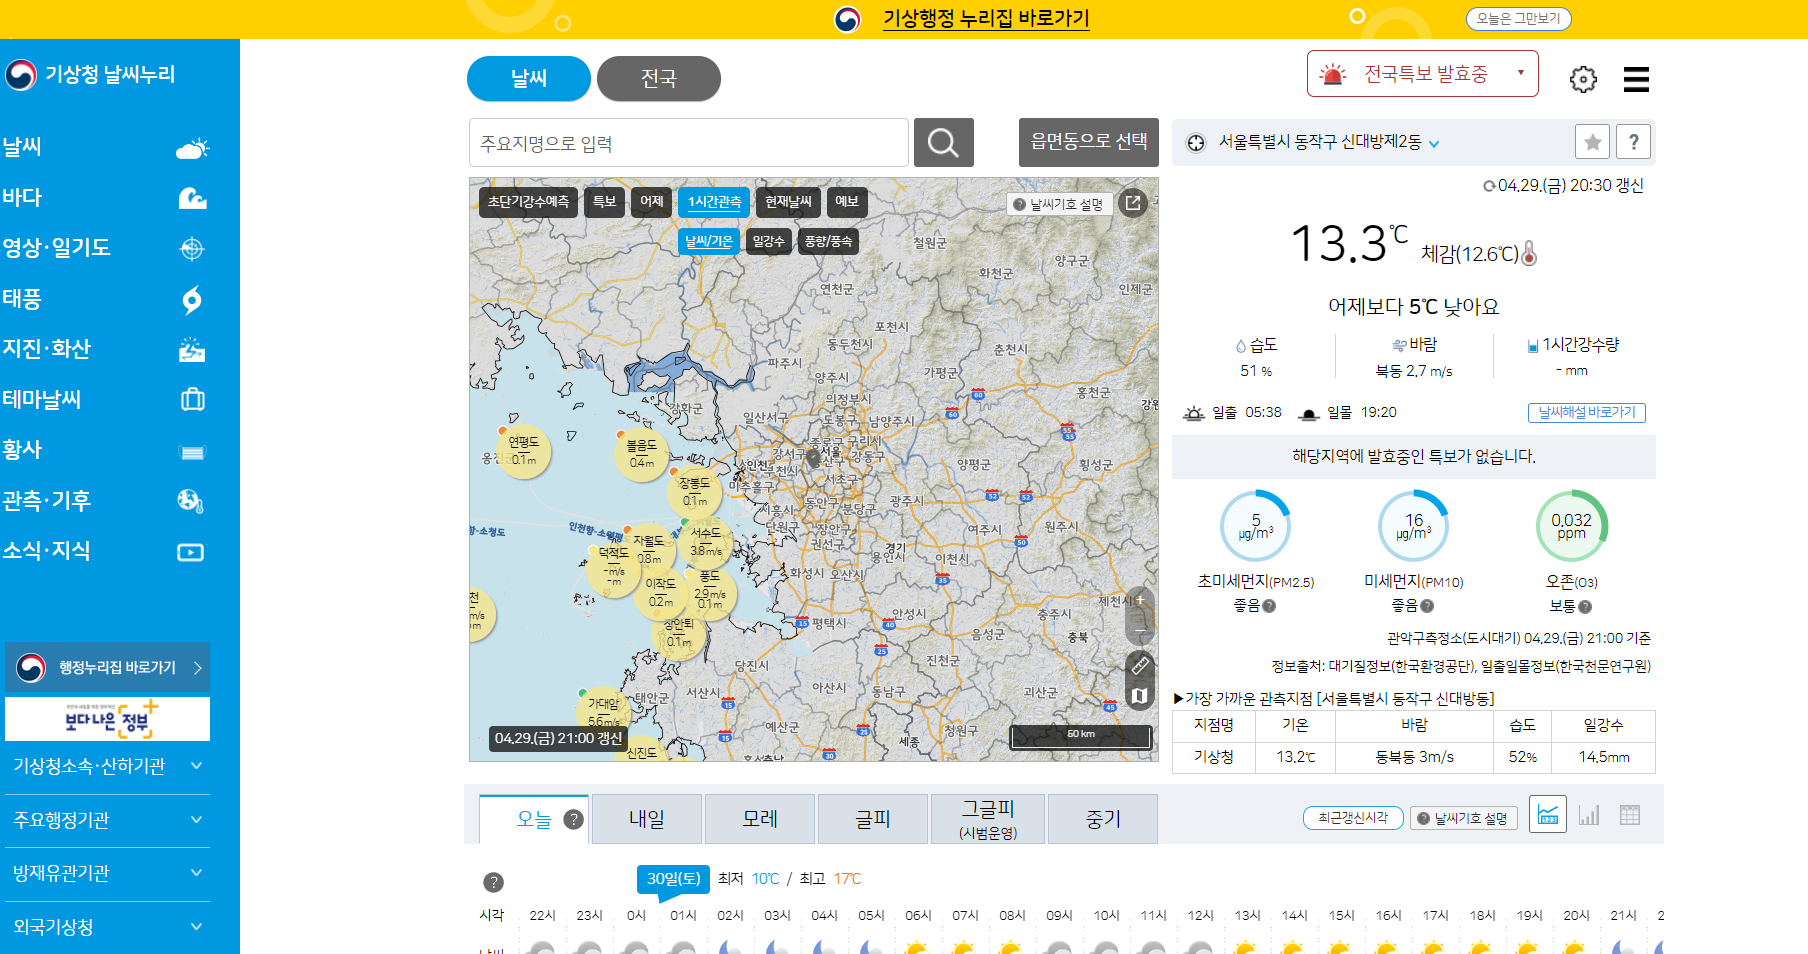


- https://www.weather.go.kr/w/index.do

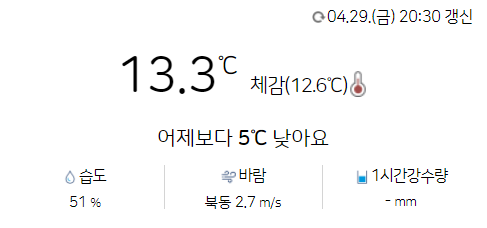

In [ ]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options


opt = Options()
opt.headless = True

driver = webdriver.Chrome(options = opt)
driver.get('https://www.weather.go.kr/w/index.do')

weather = driver.find_element(By.XPATH, '//div[contains(@class, "BGDB00")]')
weather.screenshot('1.png')

ModuleNotFoundError: ignored

# Window 작업 스케쥴러
- Window에서 특정 시각에 특정 작업 수행하도록 명령